# Pizza Sales Analysis


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import  plotly.express as px

## Import Raw Data

In [3]:
 df = pd.read_csv("pizza_sales.csv")

## MetaData Of Raw Data

In [6]:
df.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [7]:
df.tail()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
48615,48616,21348,ckn_alfredo_m,1,31-12-2015,21:23:10,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
48616,48617,21348,four_cheese_l,1,31-12-2015,21:23:10,17.95,17.95,L,Veggie,"Ricotta Cheese, Gorgonzola Piccante Cheese, Mo...",The Four Cheese Pizza
48617,48618,21348,napolitana_s,1,31-12-2015,21:23:10,12.00,12.00,S,Classic,"Tomatoes, Anchovies, Green Olives, Red Onions,...",The Napolitana Pizza
48618,48619,21349,mexicana_l,1,31-12-2015,22:09:54,20.25,20.25,L,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza
48619,48620,21350,bbq_ckn_s,1,31-12-2015,23:02:05,12.75,12.75,S,Chicken,"Barbecued Chicken, Red Peppers, Green Peppers,...",The Barbecue Chicken Pizza


In [9]:
print("meta data raw data:" , df.shape)

meta data raw data: (48620, 12)


In [11]:
print("rows of dataset:" , df.shape[0])

rows of dataset: 48620


In [12]:
print("columns of dataset:" , df.shape[1])

columns of dataset: 12


In [13]:
df.columns

Index(['pizza_id', 'order_id', 'pizza_name_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


 ## Data Type in Raw Data

In [15]:
df.dtypes

pizza_id               int64
order_id               int64
pizza_name_id         object
quantity               int64
order_date            object
order_time            object
unit_price           float64
total_price          float64
pizza_size            object
pizza_category        object
pizza_ingredients     object
pizza_name            object
dtype: object

In [16]:
df.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


## KPIs

In [24]:
total_revenue = df['total_price'].sum()
total_pizza_sold = df['quantity'].sum()
total_orders = df['order_id'].nunique()
avg_orders_value = total_revenue/total_orders
avg_pizzas_per_orders = total_pizza_sold/total_orders

print(f" Total_Revenue :${total_revenue:,.2f}")
print(f" Total_Pizza_Sold :{total_pizza_sold:,}")
print(f" Total_Orders :{total_orders:,}")
print(f" Avg_Orders_Value :${avg_orders_value:,.2f}")
print(f" Avg_Pizzas_Per_Orders :${avg_pizzas_per_orders:,.2f}")



 Total_Revenue :$817,860.05
 Total_Pizza_Sold :49,574
 Total_Orders :21,350
 Avg_Orders_Value :$38.31
 Avg_Pizzas_Per_Orders :$2.32


## Charts

### Ingredient Analysis

In [31]:
ingredients = (
                df['pizza_ingredients']
                .str.split(',')
                .explode()
                .str.strip()
                .value_counts()
                .reset_index()
                .rename(columns={'index':'count','pizza_ingredients':'ingredient'})
)
print(ingredients.head(10))

          ingredient  count
0             Garlic  27422
1           Tomatoes  26601
2         Red Onions  19547
3        Red Peppers  16284
4  Mozzarella Cheese  10333
5          Pepperoni  10300
6            Spinach  10012
7          Mushrooms   9624
8            Chicken   8443
9          Capocollo   6572


### Daily Trend

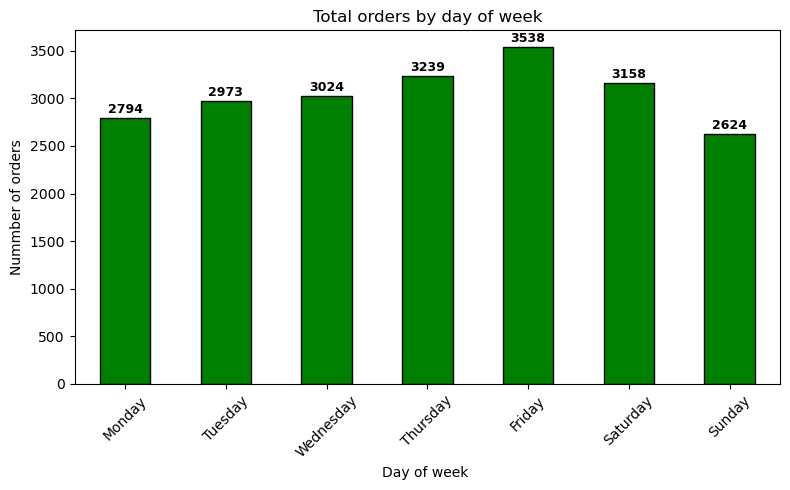

In [22]:
df['order_date']= pd.to_datetime(df['order_date'],dayfirst=True)

df['day_name']=df['order_date'].dt.day_name()

weekly_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']

df['day_name'] = pd.Categorical(df['day_name'],categories=weekly_order,ordered=True)
orders_by_day = df.groupby('day_name',observed = False)['order_id'].nunique()

ax = orders_by_day.plot(kind='bar',figsize=(8,5),color='green',edgecolor='black')

plt.title('Total orders by day of week')
plt.xlabel('Day of week ')
plt.ylabel('Nummber of orders')
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_day):
     plt.text(i,val+20,str(val),ha='center',va='bottom',fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()

### Daily  Trend -Total Revenue

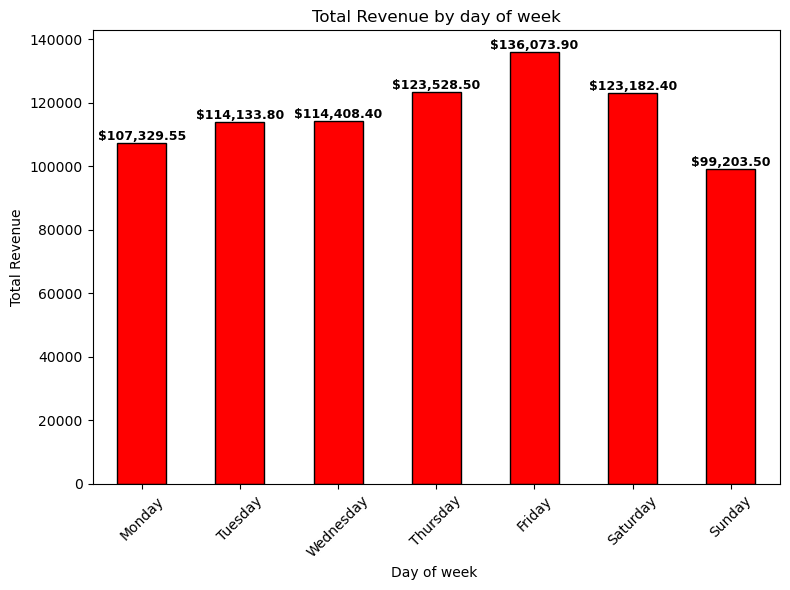

In [36]:
df['order_date']=pd.to_datetime(df['order_date'],dayfirst = True)
df['day_name'] =df['order_date'].dt.day_name()
weekly_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['day_name']=pd.Categorical(df['day_name'],categories=weekly_order,ordered=True)
total_revenue = df.groupby('day_name',observed=False)['total_price'].sum()
ax = total_revenue.plot(kind ='bar',figsize=(8,6),color = 'red',edgecolor= 'black')
plt.title('Total Revenue by day of week')
plt.xlabel('Day of week ')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
for i ,val in enumerate(total_revenue):
      plt.text(i,val+20,f'${val:,.2f}',ha='center',va='bottom',fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()

### Daily Trend - Total Quantity

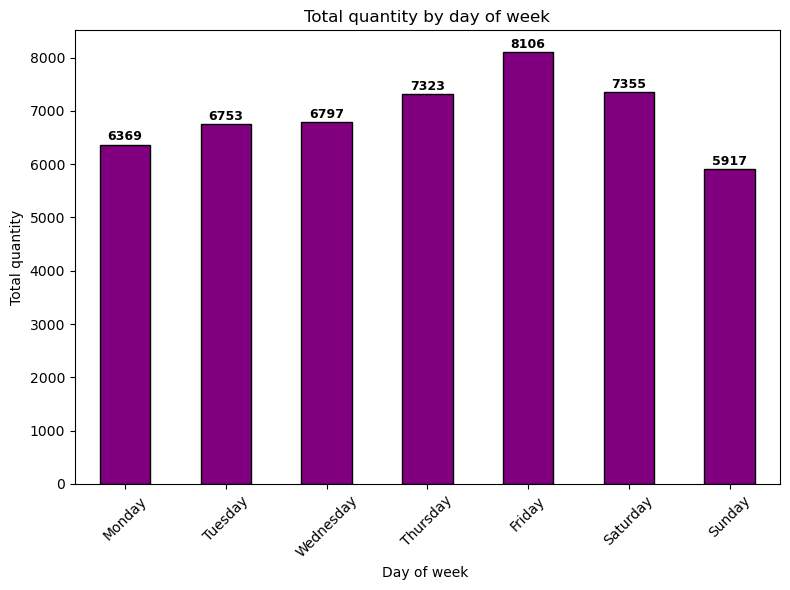

In [41]:
df['order_date']=pd.to_datetime(df['order_date'],dayfirst = True)
df['day_name'] =df['order_date'].dt.day_name()
weekly_order = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
df['day_name']=pd.Categorical(df['day_name'],categories=weekly_order,ordered=True)
total_quantity = df.groupby('day_name',observed=False)['quantity'].count()
ax = total_quantity.plot(kind ='bar',figsize=(8,6),color = 'purple',edgecolor= 'black')
plt.title('Total quantity by day of week')
plt.xlabel('Day of week ')
plt.ylabel('Total quantity')
plt.xticks(rotation=45)
for i ,val in enumerate(total_quantity):
      plt.text(i,val+20,str(val),ha='center',va='bottom',fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()

### Hourly Trend - Total Orders

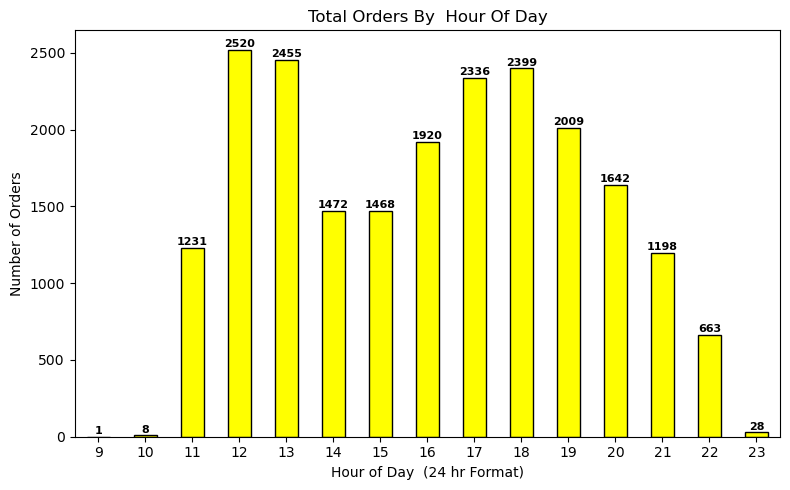

In [8]:
df['order_time'] = pd.to_datetime(df['order_time'],format='%H:%M:%S')

df['order_hour'] = df['order_time'].dt.hour

order_by_hour = df.groupby('order_hour',observed=False)['order_id'].nunique()

ax = order_by_hour.plot(kind = 'bar',figsize=(8,5),color = 'yellow' ,edgecolor='black')

plt.title("Total Orders By  Hour Of Day")
plt.xlabel("Hour of Day  (24 hr Format)")
plt.ylabel("Number of Orders")
plt.xticks(rotation=0)

for i,val in enumerate(order_by_hour):
     plt.text(i,val+5,str(val),ha='center',va='bottom',fontsize=8,fontweight='bold')
plt.tight_layout()
plt.show()

### Hourly Trend - Total Revenue

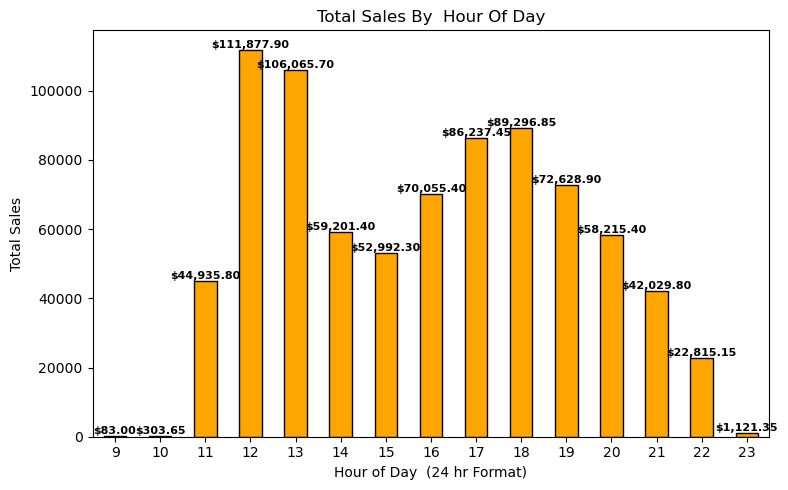

In [5]:
df['order_time'] = pd.to_datetime(df['order_time'],format='%H:%M:%S')

df['order_hour'] = df['order_time'].dt.hour

order_by_hour_sales = df.groupby('order_hour',observed=False)['total_price'].sum()

ax = order_by_hour_sales.plot(kind = 'bar',figsize=(8,5),color = 'orange' ,edgecolor='black')

plt.title("Total Sales By  Hour Of Day")
plt.xlabel("Hour of Day  (24 hr Format)")
plt.ylabel("Total Sales")
plt.xticks(rotation=0)

for i,val in enumerate(order_by_hour_sales):
     plt.text(i,val+5,f'${val:,.2f}',ha='center',va='bottom',fontsize=8,fontweight='bold')
plt.tight_layout()
plt.show()

### Monthly Trend - Total orders

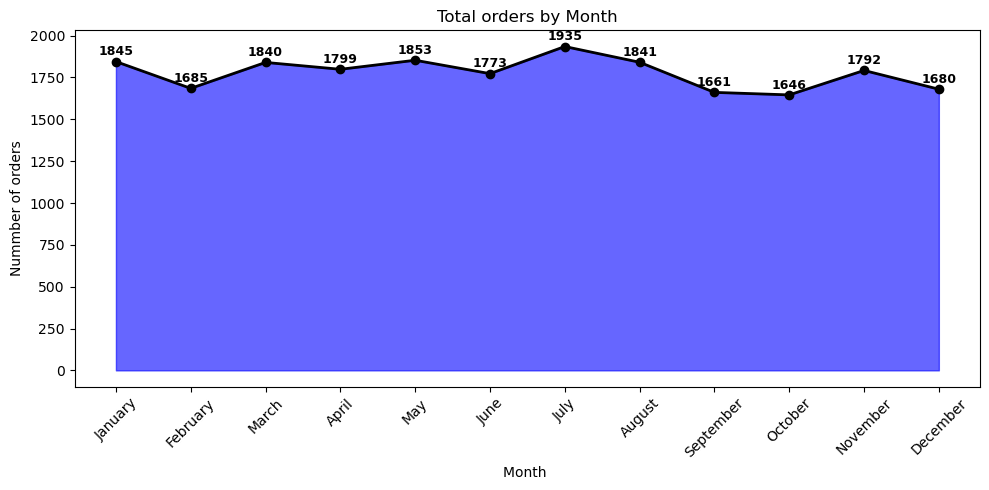

In [16]:
df['order_date']= pd.to_datetime(df['order_date'],dayfirst=True)

df['month_name']=df['order_date'].dt.month_name()

monthly_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

df['month_name'] = pd.Categorical(df['month_name'],categories=monthly_order,ordered=True)
orders_by_month = df.groupby('month_name',observed = False)['order_id'].nunique()

plt.figure(figsize=(10,5))
plt.fill_between(orders_by_month.index,orders_by_month.values,color='blue',alpha=0.6)
plt.plot(orders_by_month.index,orders_by_month.values,color='black',linewidth=2,marker='o')

plt.title('Total orders by Month')
plt.xlabel('Month ')
plt.ylabel('Nummber of orders')
plt.xticks(rotation=45)

for i, val in enumerate(orders_by_month):
     plt.text(i,val+20,str(val),ha='center',va='bottom',fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()

### Monthly Trend - Total Sales

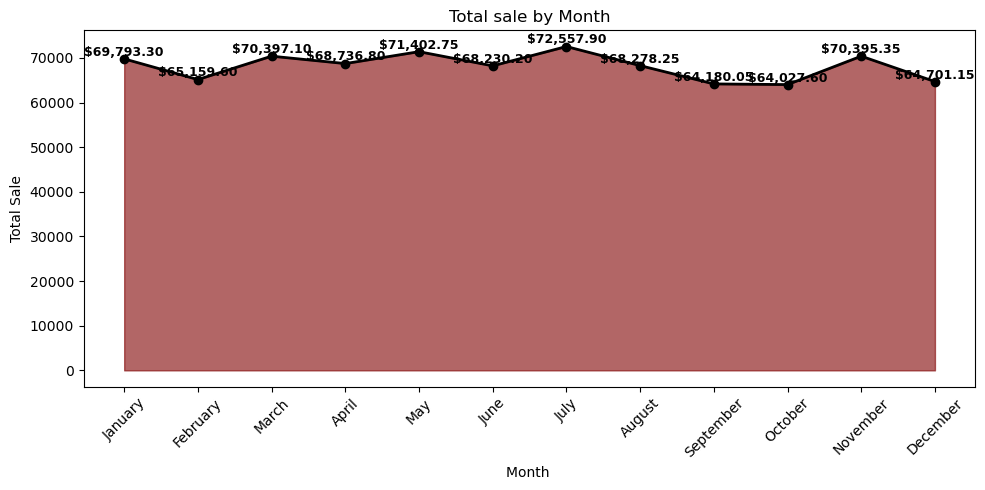

In [13]:
df['order_date']= pd.to_datetime(df['order_date'],dayfirst=True)

df['month_name']=df['order_date'].dt.month_name()

monthly_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

df['month_name'] = pd.Categorical(df['month_name'],categories=monthly_order,ordered=True)
totalsale_by_month = df.groupby('month_name',observed = False)['total_price'].sum()

plt.figure(figsize=(10,5))
plt.fill_between(totalsale_by_month.index,totalsale_by_month.values,color='maroon',alpha=0.6)
plt.plot(totalsale_by_month.index,totalsale_by_month.values,color='black',linewidth=2,marker='o')

plt.title('Total sale by Month')
plt.xlabel('Month ')
plt.ylabel('Total Sale')
plt.xticks(rotation=45)

for i, val in enumerate(totalsale_by_month):
     plt.text(i,val+20,f'${val:,.2f}',ha='center',va='bottom',fontsize=9,fontweight='bold')
plt.tight_layout()
plt.show()

### % Sales Category

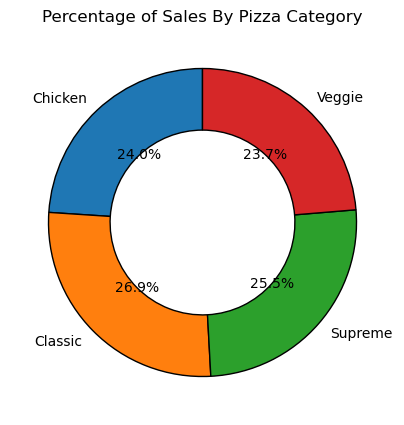

In [28]:
category_sales = df.groupby('pizza_category')['total_price'].sum()

category_pct = category_sales/category_sales.sum() *100

plt.figure(figsize=(5,5))
colors=plt.get_cmap('tab20').colors #color palete

plt.pie(category_pct,labels=category_pct.index,autopct='%1.1f%%',startangle=90,wedgeprops={'edgecolor':'black','width':0.4})
plt.title('Percentage of Sales By Pizza Category')
plt.show()

### Sales by Pizza Size & Category

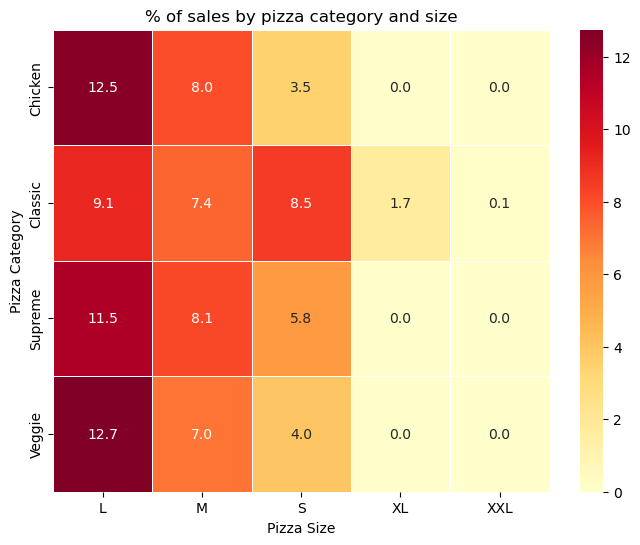

In [11]:
Sales_pivot = df.pivot_table(
    index='pizza_category',
    columns='pizza_size',
    values='total_price',
    aggfunc='sum',
    fill_value=0
)

sales_pct = Sales_pivot/Sales_pivot.sum().sum() * 100

plt.figure(figsize=(8,6))
sns.heatmap(sales_pct,annot=True,fmt='.1f',cmap='YlOrRd',linewidth=0.5)
plt.title('% of sales by pizza category and size')
plt.ylabel('Pizza Category')
plt.xlabel('Pizza Size')
plt.show()

### Total Pizza s Sold By Pizza Category

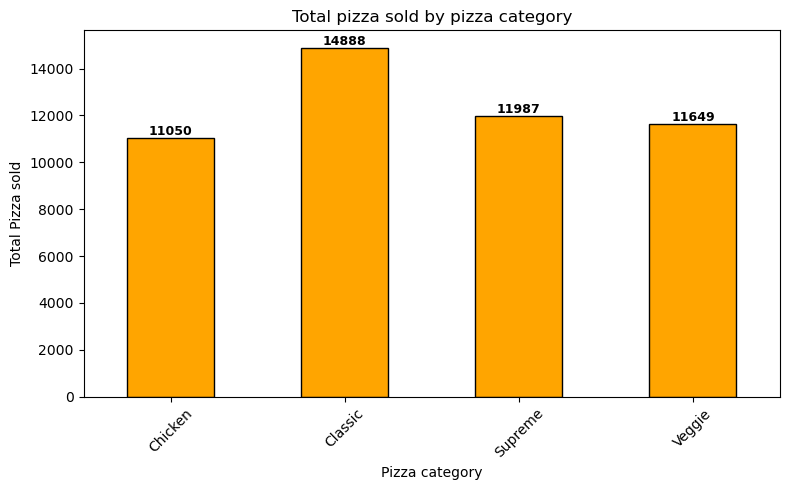

In [20]:
pizza_by_category = df.groupby('pizza_category')['quantity'].sum()

ax = pizza_by_category.plot(kind='bar',figsize=(8,5),color = 'orange',edgecolor ='black')

plt.title("Total pizza sold by pizza category")
plt.xlabel("Pizza category")
plt.ylabel("Total Pizza sold")
plt.xticks(rotation=45)

for i,val in enumerate(pizza_by_category):
    plt.text(i,val+5,str(val), ha='center', va='bottom',fontsize=9,fontweight='bold')

plt.tight_layout()
plt.show()

### Top 5 Best Selling Pizza's - Total Quantity


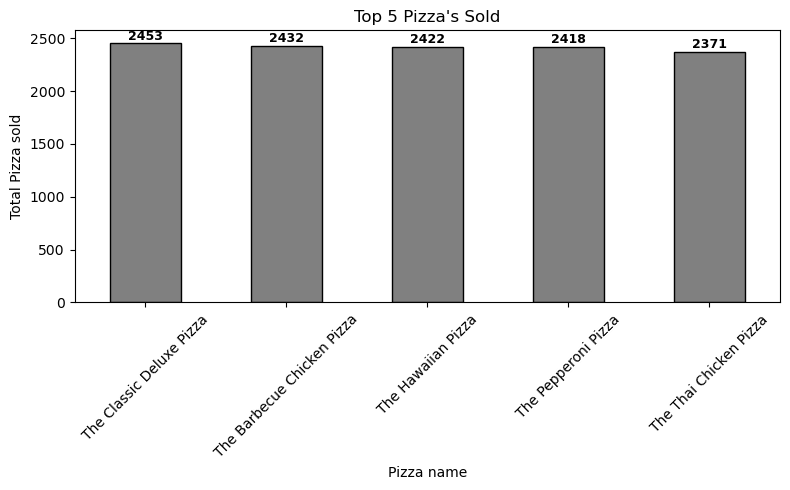

In [22]:
pizza_by_name = df.groupby('pizza_name')['quantity'].sum()

top5 = pizza_by_name.sort_values(ascending=False).head(5)
ax = top5.plot(kind='bar',figsize=(8,5),color = 'grey',edgecolor ='black')

plt.title("Top 5 Pizza's Sold")
plt.xlabel("Pizza name")
plt.ylabel("Total Pizza sold")
plt.xticks(rotation=45)

for i,val in enumerate(top5):
    plt.text(i,val+5,str(val), ha='center', va='bottom',fontsize=9,fontweight='bold')

plt.tight_layout()
plt.show()

### Bottom 5 Best Selling Pizza's - Total Quantity

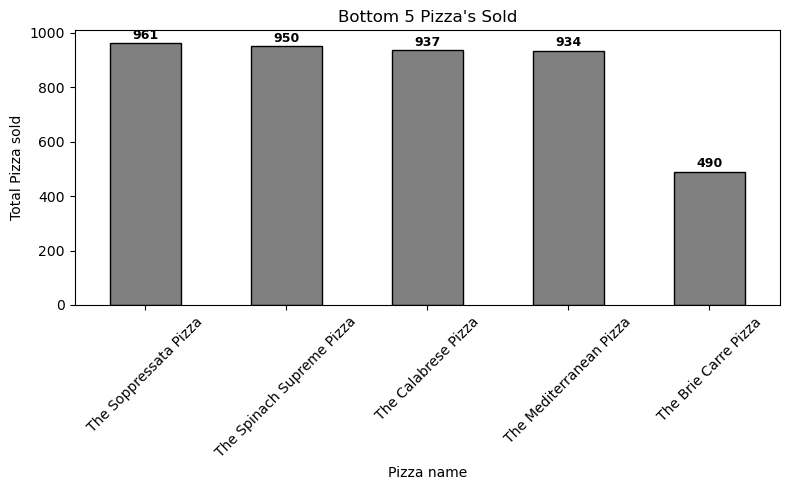

In [23]:
pizza_by_name = df.groupby('pizza_name')['quantity'].sum()

Bottom5 = pizza_by_name.sort_values(ascending=False).tail(5)
ax = Bottom5.plot(kind='bar',figsize=(8,5),color = 'grey',edgecolor ='black')

plt.title("Bottom 5 Pizza's Sold")
plt.xlabel("Pizza name")
plt.ylabel("Total Pizza sold")
plt.xticks(rotation=45)

for i,val in enumerate(Bottom5):
    plt.text(i,val+5,str(val), ha='center', va='bottom',fontsize=9,fontweight='bold')

plt.tight_layout()
plt.show()

### Top 5 Best Selling Pizza's - Total Orders

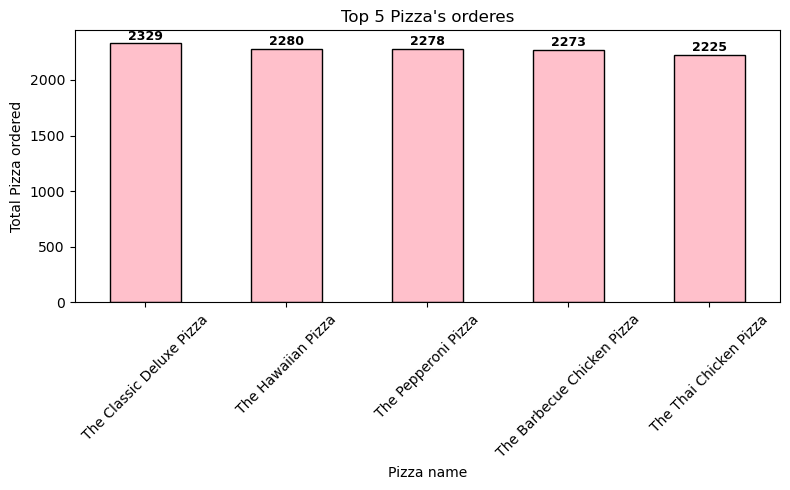

In [24]:
pizza_by_name = df.groupby('pizza_name')['order_id'].nunique()

top5 = pizza_by_name.sort_values(ascending=False).head(5)
ax = top5.plot(kind='bar',figsize=(8,5),color = 'pink',edgecolor ='black')

plt.title("Top 5 Pizza's orderes")
plt.xlabel("Pizza name")
plt.ylabel("Total Pizza ordered")
plt.xticks(rotation=45)

for i,val in enumerate(top5):
    plt.text(i,val+5,str(val), ha='center', va='bottom',fontsize=9,fontweight='bold')

plt.tight_layout()
plt.show()

### Bottom 5 Best Selling Pizza's - Total Orders

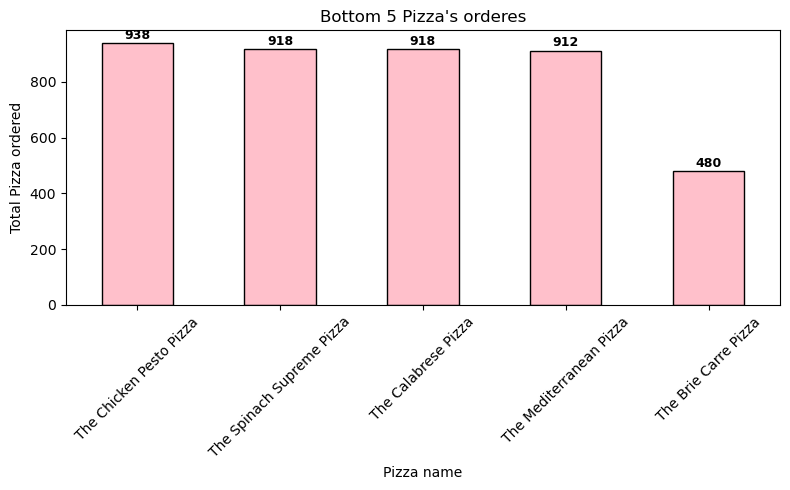

In [25]:
pizza_by_name = df.groupby('pizza_name')['order_id'].nunique()

top5 = pizza_by_name.sort_values(ascending=False).tail(5)
ax = top5.plot(kind='bar',figsize=(8,5),color = 'pink',edgecolor ='black')

plt.title("Bottom 5 Pizza's orderes")
plt.xlabel("Pizza name")
plt.ylabel("Total Pizza ordered")
plt.xticks(rotation=45)

for i,val in enumerate(top5):
    plt.text(i,val+5,str(val), ha='center', va='bottom',fontsize=9,fontweight='bold')

plt.tight_layout()
plt.show()

### Top 5 Best Selling Pizza's - Total Sales

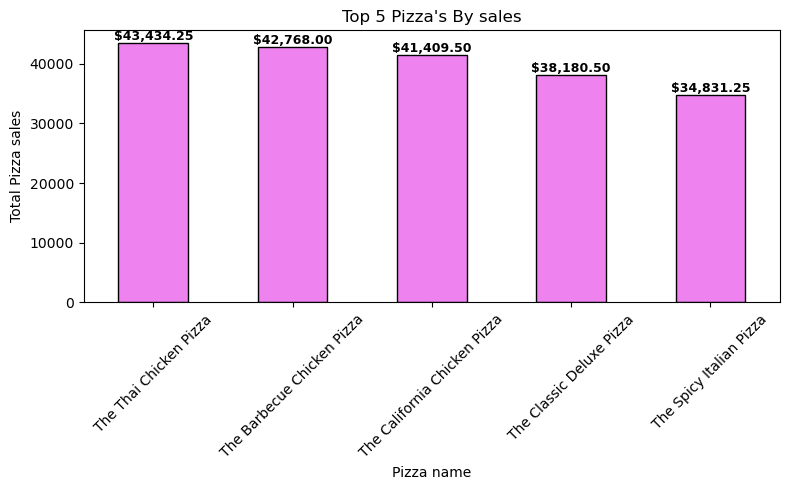

In [29]:
pizza_by_name = df.groupby('pizza_name')['total_price'].sum()

top5 = pizza_by_name.sort_values(ascending=False).head(5)
ax = top5.plot(kind='bar',figsize=(8,5),color = 'violet',edgecolor ='black')

plt.title("Top 5 Pizza's By sales")
plt.xlabel("Pizza name")
plt.ylabel("Total Pizza sales")
plt.xticks(rotation=45)

for i,val in enumerate(top5):
    plt.text(i,val+5,f'${val:,.2f}', ha='center', va='bottom',fontsize=9,fontweight='bold')

plt.tight_layout()
plt.show()

### Bottom 5 Best Selling Pizza's - Total Sales

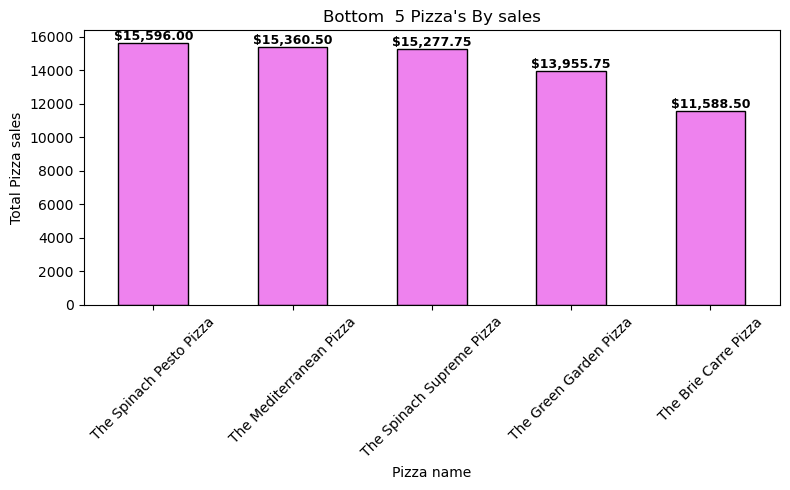

In [31]:
pizza_by_name = df.groupby('pizza_name')['total_price'].sum()

top5 = pizza_by_name.sort_values(ascending=False).tail(5)
ax = top5.plot(kind='bar',figsize=(8,5),color = 'violet',edgecolor ='black')

plt.title("Bottom  5 Pizza's By sales")
plt.xlabel("Pizza name")
plt.ylabel("Total Pizza sales")
plt.xticks(rotation=45)

for i,val in enumerate(top5):
    plt.text(i,val+5,f'${val:,.2f}', ha='center', va='bottom',fontsize=9,fontweight='bold')

plt.tight_layout()
plt.show()